## Goal of The Project


In [2]:
#Importing Libraries
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [3]:
#reading, renaming and peeking through the data
df = pd.read_csv('amazon.csv')
print(df.columns)
df = df.rename(columns={'Name':'name','Author':'author','User Rating':"rating",'Reviews':'reviews', 'Price':'price','Year':'year', 'Genre':'genre'})
print(df.columns)
print(df.head())
print(len(df))


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
Index(['name', 'author', 'rating', 'reviews', 'price', 'year', 'genre'], dtype='object')
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  rating  reviews  price  year        genre  
0                  JJ Smith     4.7    17350      8  2016  Non Fiction  
1              Stephen King     4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson     4.7    18979     15  2018  Non Fiction  
3             George Orwell     4.7    21424      6  2017      Fiction  
4  National Geographic Kids     4.8     7665     12  2019  Non Fiction  
550


In [4]:
# pie chart comparing fiction and non fiction total
nonfic = len(df[df.genre =='Non Fiction'])
fic = len(df[df.genre =='Fiction'])
data = [nonfic,fic]

Text(0.5, 0.98, 'Fiction vs Non Fiction Books in the top 50')

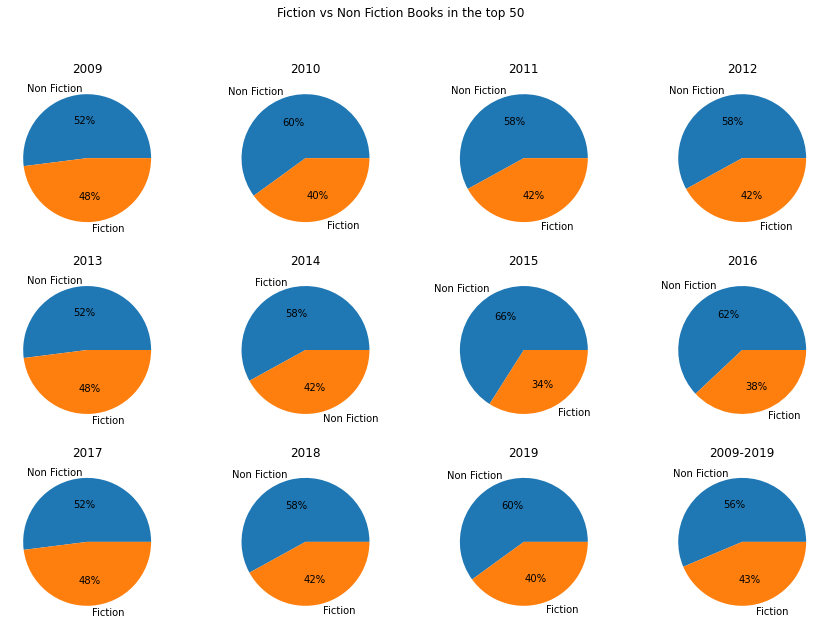

In [5]:
# pie chart comparing fiction and non fiction each year
#make a year by year list of count
#group by year see count
yearlst = list(df.year.unique())
yearlst.sort()
yearandgenre = df.groupby(df.year).genre.value_counts(normalize = True)
listyearandgenre = dict(yearandgenre)
x = 1
fig, ax = plt.subplots(figsize = (15,10))
for i in range(len(yearlst)):
    ax = plt.subplot(3,4,i+1)
    labels = list(yearandgenre[yearlst[i]].index)
    values = list(yearandgenre[yearlst[i]])
    plt.pie(values,labels = labels, autopct='%1.f%%')
    plt.title(str(yearlst[i]))
#plottting total
ax = plt.subplot(3,4, i+2)
plt.title('2009-2019')
plt.pie(data,labels = labels,autopct='%1d%%')

plt.suptitle('Fiction vs Non Fiction Books in the top 50')

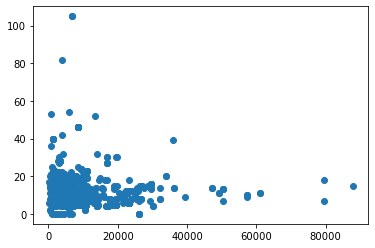

In [6]:
# seeing reviews per price scatter
plt.scatter(df.reviews,df.price)

<AxesSubplot:xlabel='year', ylabel='price'>

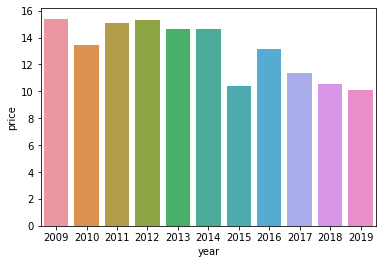

In [7]:
#  bar graph average price per year and analysis
avgprice = df.groupby('year').price.mean()
avgprice
sns.barplot(x = avgprice.index,y= avgprice)

<AxesSubplot:xlabel='author', ylabel='price'>

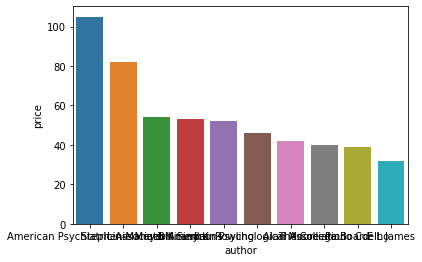

In [8]:
# seeing top 10 authors price
mostexpensiveauthor = df.sort_values(by = 'price', ascending= False,).drop_duplicates(subset='author')[:10]
mostexpensiveauthor
sns.barplot(data = mostexpensiveauthor, x = 'author', y = 'price' )

<AxesSubplot:xlabel='name', ylabel='price'>

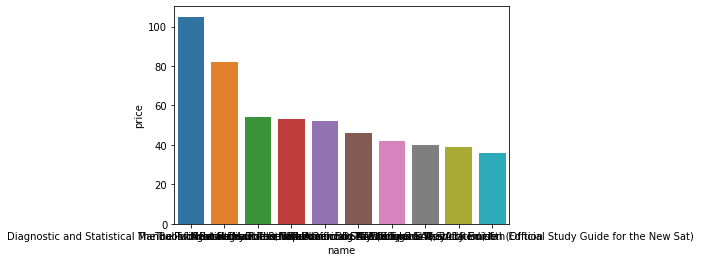

In [9]:
#see most expensive books
mostexpensivebooks = df.sort_values(by = 'price', ascending= False,).drop_duplicates(subset='name')[:10]
sns.barplot(data = mostexpensivebooks, x = 'name', y = 'price' )

<AxesSubplot:xlabel='author', ylabel='price'>

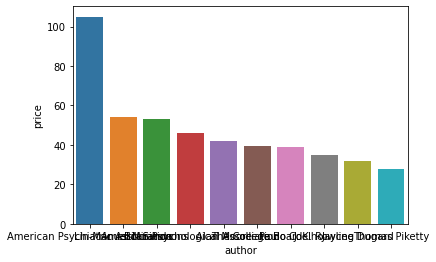

In [10]:
#see highest average price authors
avgauthorprice = df.groupby('author').price.mean().sort_values(ascending = False)[:10]
sns.barplot(x = avgauthorprice.index,y= avgauthorprice)

<AxesSubplot:xlabel='year', ylabel='price'>

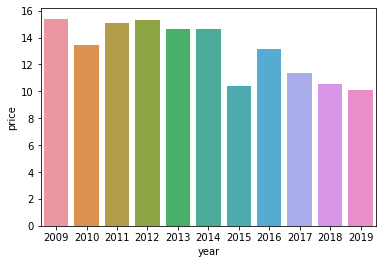

<AxesSubplot:xlabel='author', ylabel='name'>

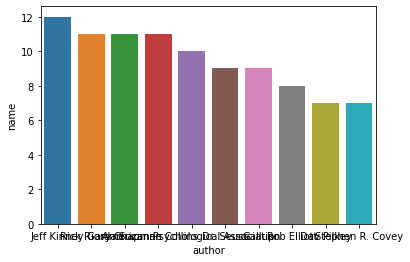

In [11]:
#10 author with the most best selling books
mostbestselling = df.groupby('author').name.count().sort_values(ascending = False)[:10]

sns.barplot(x = mostbestselling.index, y= mostbestselling)

<AxesSubplot:xlabel='author', ylabel='reviews'>

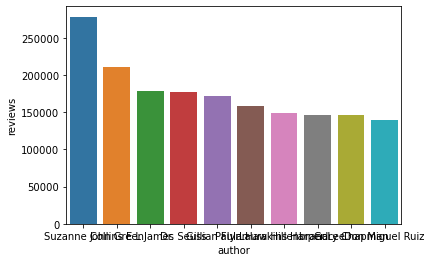

In [12]:
#author with the most review
mostreview = df.groupby('author').reviews.sum().sort_values(ascending = False)[:10]
sns.barplot(x = mostreview.index, y= mostreview)

<AxesSubplot:xlabel='rating', ylabel='reviews'>

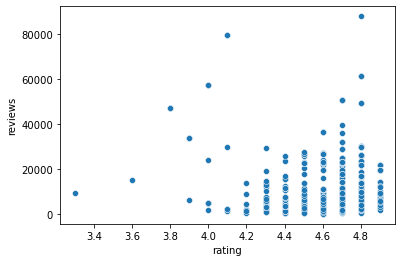

In [13]:
#author with the highest rated book
sns.scatterplot(data = df, x = 'rating', y = 'reviews')

<AxesSubplot:xlabel='author', ylabel='rating'>

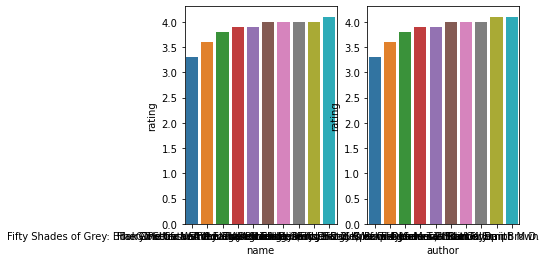

In [14]:
#lowest rated books
lowestratedbook = df.sort_values(by = 'rating').drop_duplicates(subset= 'name')[:10]
lowestratedauthor = df.sort_values(by = 'rating').drop_duplicates(subset= 'author')[:10]
plt.subplot(1,2,1)
sns.barplot(data = lowestratedbook, x = 'name', y= 'rating')
plt.subplot(1,2,2)
sns.barplot(data = lowestratedauthor, x = 'author', y= 'rating')

<AxesSubplot:ylabel='reviews'>

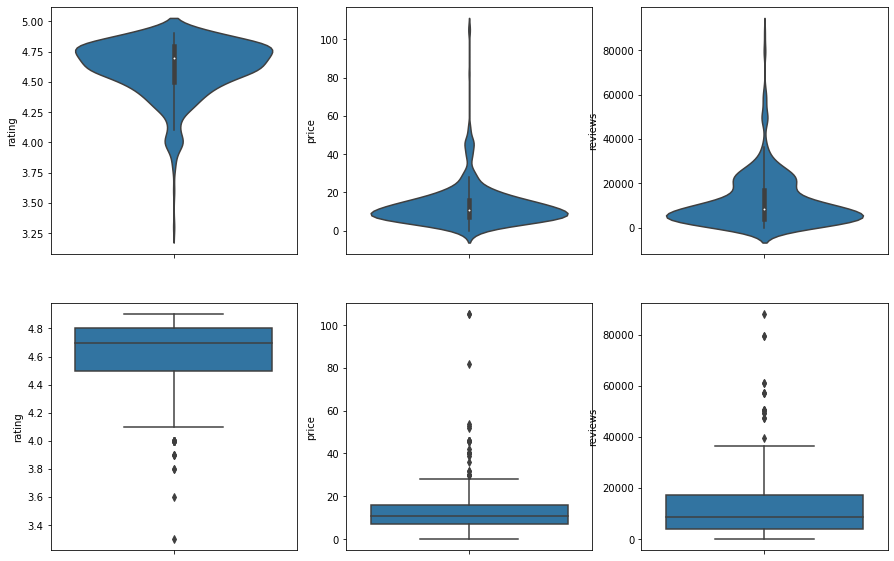

In [15]:
#violin plot of reviews and amount of reviews
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.violinplot(data=df, y = 'rating')
plt.subplot(2,3,2)
sns.violinplot(data = df, y = 'price')
plt.subplot(2,3,3)
sns.violinplot(data = df, y = 'reviews')
#violin plot of reviews and amount of reviews
plt.subplot(2,3,4)
sns.boxplot(data=df, y = 'rating')
plt.subplot(2,3,5)
sns.boxplot(data = df, y = 'price')
plt.subplot(2,3,6)
sns.boxplot(data = df, y = 'reviews')

           rating       reviews         price         year
rating   0.051520 -4.603910e+00     -0.327523     0.174135
reviews -4.603910  1.376195e+08 -13887.062842  9786.196721
price   -0.327523 -1.388706e+04    117.554645    -5.284153
year     0.174135  9.786197e+03     -5.284153    10.018215


,rating,reviews,price,year
rating,1.000000,-0.001729,-0.133086,0.242383
reviews,-0.001729,1.000000,-0.109182,0.263560
price,-0.133086,-0.109182,1.000000,-0.153979
year,0.242383,0.263560,-0.153979,1.000000


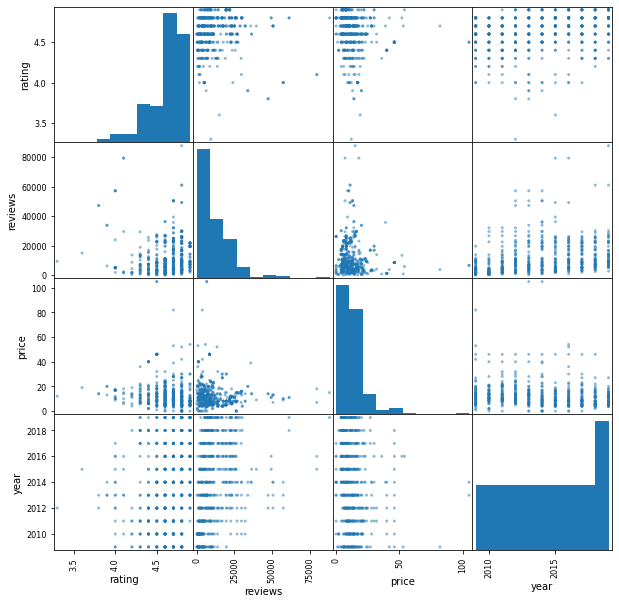

In [28]:
#show model correlation between amount of review and price
#use .corr
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, figsize=(10, 10))
print(df.cov())
df.corr()